In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
noOfDays = 50

In [3]:
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wticl1 = pd.read_csv(url, index_col=0, parse_dates=True)
wticl1.sort_index(inplace=True)
wticl1_last = wticl1['Last']
wticl1['PctCh'] = wticl1.Last.pct_change()

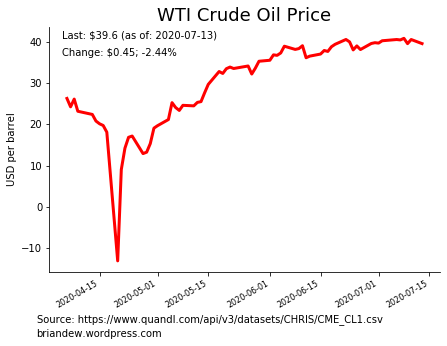

In [4]:
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = wticl1_last.tail(68).plot(color='red',linewidth=3)
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel('')
ax1.set_title('WTI Crude Oil Price', fontsize=18)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)
fig.text(0.15, 0.85,'Last: $' + str(wticl1.Last[-1])\
         + ' (as of: ' \
         + str(wticl1.index[-1].strftime('%Y-%m-%d'))\
         + ')');
fig.text(0.15, 0.80,'Change: $' + str(wticl1.Change[-1])\
         + '; ' \
         + str((np.round((wticl1.PctCh[-1] * 100), \
         decimals=2))) + '%')
fig.text(0.1, 0.06, 'Source: ' + url)
fig.text(0.1, 0.02, 'briandew.wordpress.com')
plt.savefig('charts/oil.png', dpi=1000)

In [5]:
modeldata = pd.read_csv('data/data.csv')

In [6]:
modeldata.head()

,Date,Open,High,Low,Close,Change,Settle,Volume,Previous Day Open Interest,PctCh,...,NATR_100,NATR_200,TR,chaikinAD,chaikinAD_OSC,OBV,avgprice,medprice,typprice,wclprice
0,1983-03-30,29.01,29.56,29.01,29.40,NaN,29.40,949.0,470.0,NaN,...,NaN,NaN,NaN,396.854545,NaN,949.0,29.2450,29.285,29.323333,29.3425
1,1983-03-31,29.40,29.60,29.25,29.29,NaN,29.29,521.0,523.0,-0.003741,...,NaN,NaN,0.35,-5.059740,NaN,428.0,29.3850,29.425,29.380000,29.3575
2,1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156.0,583.0,0.005121,...,NaN,NaN,0.41,-46.913399,NaN,584.0,29.4325,29.495,29.476667,29.4675
3,1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175.0,623.0,0.009171,...,NaN,NaN,0.36,23.086601,NaN,759.0,29.6275,29.650,29.670000,29.6800
4,1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392.0,640.0,0.006395,...,NaN,NaN,0.27,357.012527,NaN,1151.0,29.8425,29.785,29.823333,29.8425


In [7]:
modeldata.shape

(8907, 181)

In [8]:
modeldata = modeldata.set_index('Date')

In [9]:
modeldata.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Settle', 'Volume',
       'Previous Day Open Interest', 'PctCh', 'bbands_high',
       ...
       'NATR_100', 'NATR_200', 'TR', 'chaikinAD', 'chaikinAD_OSC', 'OBV',
       'avgprice', 'medprice', 'typprice', 'wclprice'],
      dtype='object', length=180)

In [10]:
# pct change and change are same columns
#settle and close are same columns
#modeldata.pop('Change')
#modeldata.pop('Settle')

In [11]:
modeldata.head()

,Open,High,Low,Close,Change,Settle,Volume,Previous Day Open Interest,PctCh,bbands_high,...,NATR_100,NATR_200,TR,chaikinAD,chaikinAD_OSC,OBV,avgprice,medprice,typprice,wclprice
Date,,,,,,,,,,,,,,,,,,,,,
1983-03-30,29.01,29.56,29.01,29.40,NaN,29.40,949.0,470.0,NaN,NaN,...,NaN,NaN,NaN,396.854545,NaN,949.0,29.2450,29.285,29.323333,29.3425
1983-03-31,29.40,29.60,29.25,29.29,NaN,29.29,521.0,523.0,-0.003741,NaN,...,NaN,NaN,0.35,-5.059740,NaN,428.0,29.3850,29.425,29.380000,29.3575
1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156.0,583.0,0.005121,NaN,...,NaN,NaN,0.41,-46.913399,NaN,584.0,29.4325,29.495,29.476667,29.4675
1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175.0,623.0,0.009171,NaN,...,NaN,NaN,0.36,23.086601,NaN,759.0,29.6275,29.650,29.670000,29.6800
1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392.0,640.0,0.006395,NaN,...,NaN,NaN,0.27,357.012527,NaN,1151.0,29.8425,29.785,29.823333,29.8425


In [12]:
modeldata.shape

(8907, 180)

In [13]:
# we want to predict next day price movement
modeldata.PctCh = modeldata.PctCh.shift(-1)

In [14]:
#drop last row with percent change Nan due to shift
modeldata.drop(modeldata.tail(1).index,inplace=True)
modeldata.tail()

,Open,High,Low,Close,Change,Settle,Volume,Previous Day Open Interest,PctCh,bbands_high,...,NATR_100,NATR_200,TR,chaikinAD,chaikinAD_OSC,OBV,avgprice,medprice,typprice,wclprice
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,70.06,70.36,69.64,69.88,0.45,69.80,416101.0,413062.0,-0.007298,70.814882,...,2.231932,2.155690,0.72,5.940741e+07,322965.120560,22330010.0,69.9850,70.000,69.96,69.9400
2018-09-04,69.89,71.40,69.08,69.37,0.07,69.87,782807.0,412237.0,-0.010523,71.046034,...,2.259302,2.177403,2.32,5.882031e+07,75931.201659,21547203.0,69.9350,70.240,69.95,69.8050
2018-09-05,69.43,69.59,68.56,68.64,1.15,68.72,537722.0,408792.0,-0.010927,71.132261,...,2.275502,2.197060,1.03,5.836612e+07,-176546.719066,21009481.0,69.0550,69.075,68.93,68.8575
2018-09-06,68.64,69.02,67.00,67.89,0.95,67.77,624741.0,398883.0,-0.000442,70.869783,...,2.307388,2.225102,2.02,5.829189e+07,-287401.011004,20384740.0,68.1375,68.010,67.97,67.9500
2018-09-07,67.88,68.08,66.86,67.86,0.02,67.75,517770.0,378062.0,-0.004863,70.615631,...,2.303302,2.223944,1.22,5.862292e+07,-201294.358942,19866970.0,67.6700,67.470,67.60,67.6650


In [15]:
modeldata_prediction = modeldata['2018-08-11':] # test data for all Models (except LSTM)
modeldata_prediction_LSTM = modeldata['2018-08-11':] # prediction data for only LSTM
modeldata = modeldata['1983-03-30':'2018-08-10':] # train and valid data

In [16]:
modeldata_prediction_percentages = modeldata_prediction['PctCh'].to_frame()
modeldata_prediction_percentages['Target'] = pd.cut(modeldata_prediction_percentages['PctCh'],bins=[-25,-2,-0.5,0.5,2,25], labels=[-2,-1,0,1,2])

In [17]:
modeldata_prediction.pop('PctCh')

Date
2018-08-13   -0.011571
2018-08-14   -0.025964
2018-08-15    0.008629
2018-08-16    0.007027
2018-08-17    0.010316
2018-08-20    0.010811
2018-08-21    0.011735
2018-08-22   -0.003817
2018-08-23    0.009875
2018-08-24    0.005838
2018-08-27   -0.005659
2018-08-28    0.017073
2018-08-29    0.005022
2018-08-30   -0.002427
2018-08-31   -0.007298
2018-09-04   -0.010523
2018-09-05   -0.010927
2018-09-06   -0.000442
2018-09-07   -0.004863
Name: PctCh, dtype: float64

In [18]:
final = modeldata
final_prediction_LSTM = modeldata_prediction_LSTM

In [19]:
final.dropna(inplace=True)
final_prediction_LSTM.dropna(inplace=True)


In [20]:
#final['Target'] = pd.cut(final['percentage_change'],bins=[-25,-2.5,-0.01,0.01,2.5,25], labels=[-2,-1,0,1,2])

In [21]:
#5 bins classification
#final['Target'] = pd.cut(final['PctCh'],bins=[-50,-4.6577,-1.1897,0.9769,4.179,50], labels=[-2,-1,0,1,2])

In [22]:
final['Target'] = pd.cut(final['PctCh'],bins=[-25,-2,-0.5,0.5,2,25], labels=[-2,-1,0,1,2])
final_prediction_LSTM['Target'] = pd.cut(final_prediction_LSTM['PctCh'],bins=[-25,-2,-0.5,0.5,2,25], labels=[-2,-1,0,1,2])

In [23]:
final.pop('PctCh')
final_prediction_LSTM.pop('PctCh')

Date
2018-08-13   -0.011571
2018-08-14   -0.025964
2018-08-15    0.008629
2018-08-16    0.007027
2018-08-17    0.010316
2018-08-20    0.010811
2018-08-21    0.011735
2018-08-22   -0.003817
2018-08-23    0.009875
2018-08-24    0.005838
2018-08-27   -0.005659
2018-08-28    0.017073
2018-08-29    0.005022
2018-08-30   -0.002427
2018-08-31   -0.007298
2018-09-04   -0.010523
2018-09-05   -0.010927
2018-09-06   -0.000442
2018-09-07   -0.004863
Name: PctCh, dtype: float64

In [24]:
final.dropna(inplace=True)
final_prediction_LSTM.dropna(inplace=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#used for LSTM
final_before_model = final.copy(deep=True)
final_prediction = final_prediction_LSTM.copy(deep=True)

# splitting the data

In [27]:
X = final

In [28]:
Y = final.pop('Target')

In [29]:
Y.head()

Date
2014-02-18    0
2014-02-19    0
2014-02-20    0
2014-02-21    0
2014-02-24    0
Name: Target, dtype: category
Categories (5, int64): [-2 < -1 < 0 < 1 < 2]

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(901, 179) (226, 179) (901,) (226,)


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression

# LOGISTIC REGRESSION

In [32]:
logreg = LogisticRegression()
logreg.fit(X, Y)
#LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X,Y)))

pred = logreg.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
X_test.shape

In [ ]:
Y_test.shape

In [ ]:
pred1 = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test,Y_test)))

prediction = confusion_matrix(Y_test,pred1)
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))


In [ ]:
modeldata_prediction = modeldata_prediction.fillna(value=0)

In [ ]:
log_prediction = logreg.predict(modeldata_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],log_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],log_prediction))

In [ ]:
# TUNING LOGISTIC REGRESSION

In [ ]:
logreg_new = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=12, fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                            random_state=None, solver='newton-cg', max_iter=30, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=1)
logreg_new.fit(X, Y)
#LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg_new.score(X,Y)))

pred = logreg_new.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
pred1 = logreg_new.predict(X_test)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg_new.score(X_test,Y_test)))

prediction = confusion_matrix(Y_test,pred1)
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
logreg_new_prediction = logreg_new.predict(modeldata_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],logreg_new_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],logreg_new_prediction))

# NAIVE BAYES CLASSIFICATION

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,Y)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X,Y)))

pred = gnb.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
pred1 = gnb.predict(X_test)
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test,Y_test)))

prediction = confusion_matrix(Y_test,pred1)
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
gnb_prediction = gnb.predict(modeldata_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],gnb_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],gnb_prediction))

In [ ]:
gnb.predict(modeldata_prediction)

# LINEAR DISCRIMINANT ANALYSIS

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X,Y)))

pred = lda.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
pred1 = lda.predict(X_test)

prediction = confusion_matrix(Y_test,pred1)
print(prediction)

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test,Y_test)))

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
lda_prediction = lda.predict(modeldata_prediction)
print(lda_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],lda_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],lda_prediction))

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X,Y)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X,Y)))

pred = svm.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
pred1 = svm.predict(X_test)

prediction = confusion_matrix(Y_test,pred1)
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test,Y_test)))
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
svm.predict(modeldata_prediction)

In [ ]:
svm_prediction = svm.predict(modeldata_prediction)
print(svm_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],svm_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],svm_prediction))

# KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn.fit(X,Y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X,Y)))

pred = knn.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
pred1 = knn.predict(X_test)

prediction = confusion_matrix(Y_test,pred1)
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test,Y_test)))
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
knn_prediction = knn.predict(modeldata_prediction)
print(knn_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],knn_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],knn_prediction))

# DECISSION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.013).fit(X,Y)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X,Y)))

pred = clf.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
pred1 = clf.predict(X_test)

prediction = confusion_matrix(Y_test,pred1)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test,Y_test)))
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
clf_prediction = clf.predict(modeldata_prediction)
print(clf_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],clf_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],clf_prediction))

In [ ]:
clf.feature_importances_

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, criterion='gini',max_features=6).fit(X,Y)
print('Accuracy of RANDOM FOREST CLASSIFIER on training set: {:.2f}'
     .format(rf.score(X,Y)))

pred = rf.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))


In [ ]:
pred1 = rf.predict(X_test)

prediction = confusion_matrix(Y_test,pred1)
print('Accuracy of RANDOM FOREST CLASSIFIER on test set: {:.2f}'
     .format(rf.score(X_test,Y_test)))
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
rf_prediction = rf.predict(modeldata_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],rf_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],rf_prediction))

In [ ]:
from sklearn.grid_search import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [50,100,200],
           "max_features" : [3,4,5,6],
           "criterion" : ['gini', 'entropy']}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X=X, y=Y)
print (CV_rfc.best_score_, CV_rfc.best_params_)

In [ ]:
#0.15301073971280318 {'criterion': 'gini', 'max_features': 5, 'n_estimators': 200}

In [ ]:
pred = CV_rfc.predict(X)

prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
rfc_model = CV_rfc.best_estimator_
pred1 = rfc_model.predict(X_test)

prediction = confusion_matrix(Y_test,pred1)
print(prediction)

#print(accuracy_score(Y_test,pred1), recall_score(Y_test,pred1,average='macro'), precision_score(Y_test,pred1, average='macro'))
print(classification_report(Y_test,pred1))

In [ ]:
rf_prediction = rfc_model.predict(modeldata_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],rf_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],rf_prediction))

In [ ]:
rf_prediction

In [ ]:
 rfc_model.feature_importances_

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(rfc_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances*100

In [ ]:
import os
os.getcwd()

In [ ]:
feature_importances.to_csv('D:\\internship\\Intern_AERO_40_41\importantfeature_indicators.csv', encoding='utf-8', index=True)

# XG BOOST CLASSIFIER

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
xg_model = XGBClassifier()
xg_model.fit(X,Y)

In [ ]:
print(xg_model)

In [ ]:
pred = xg_model.predict(X)
print('Accuracy of XGBOOST classifier on training set: {:.2f}'
     .format(xg_model.score(X,Y)))


prediction = confusion_matrix(Y,pred)
print(prediction)

#print(accuracy_score(Y,pred), recall_score(Y,pred,average='macro'), precision_score(Y,pred, average='macro'))
print(classification_report(Y,pred))

In [ ]:
y_pred = xg_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [ ]:
Xgboost_prediction = xg_model.predict(modeldata_prediction)
print(confusion_matrix(modeldata_prediction_percentages['Target'],Xgboost_prediction))
print(classification_report(modeldata_prediction_percentages['Target'],Xgboost_prediction))